In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [3]:
# -----------------------------
# 1. DATA GENERATION (Synthetic)
# -----------------------------
np.random.seed(42)
X = 2 * np.random.rand(200, 1)
y = 5 + 2 * X.flatten() + np.random.randn(200)


# Add more complexity (non-linear feature)
y += 0.5 * X.flatten() ** 2

In [4]:
# -----------------------------
# 2. TRAIN/TEST SPLIT
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# -----------------------------
# 3. FEATURE SCALING
# -----------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# -----------------------------
# 4. BASIC ELASTICNET MODEL
# -----------------------------
model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


print("Basic ElasticNet Results:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Basic ElasticNet Results:
MSE: 1.520490985882993
R² Score: 0.5531277550704079


In [7]:
# -----------------------------
# 5. CROSS-VALIDATION & ELASTICNETCV (Auto-tuning)
# -----------------------------
cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1],
alphas=np.logspace(-3, 2, 50),
cv=10,
random_state=42)
cv_model.fit(X_train_scaled, y_train)


print("\nBest Alpha:", cv_model.alpha_)
print("Best L1 Ratio:", cv_model.l1_ratio_)
print("CV R² Score:", cv_model.score(X_test_scaled, y_test))


Best Alpha: 0.005179474679231213
Best L1 Ratio: 0.1
CV R² Score: 0.6621208533529155


In [8]:
# -----------------------------
# 6. GRID SEARCH FOR HYPERPARAMETERS
# -----------------------------
param_grid = {
'alpha': np.logspace(-3, 2, 10),
'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}
grid = GridSearchCV(ElasticNet(random_state=42), param_grid, cv=5, scoring='r2')
grid.fit(X_train_scaled, y_train)


print("\nBest Params from GridSearch:", grid.best_params_)
print("Best Score from GridSearch:", grid.best_score_)


Best Params from GridSearch: {'alpha': 0.01291549665014884, 'l1_ratio': 0.1}
Best Score from GridSearch: 0.7663718243712362


In [9]:
# -----------------------------
# 7. ADVANCED: POLYNOMIAL FEATURES + ELASTICNET
# -----------------------------
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)


scaler_poly = StandardScaler()
X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
X_test_poly_scaled = scaler_poly.transform(X_test_poly)


poly_model = ElasticNetCV(l1_ratio=[0.1, 0.5, 0.9], alphas=np.logspace(-3, 2, 50), cv=5, random_state=42)
poly_model.fit(X_train_poly_scaled, y_train_poly)


print("\nPolynomial ElasticNet Results:")
print("Best Alpha:", poly_model.alpha_)
print("Best L1 Ratio:", poly_model.l1_ratio_)
print("R² Score (Poly):", poly_model.score(X_test_poly_scaled, y_test_poly))


Polynomial ElasticNet Results:
Best Alpha: 0.04291934260128778
Best L1 Ratio: 0.1
R² Score (Poly): 0.6917268116234564


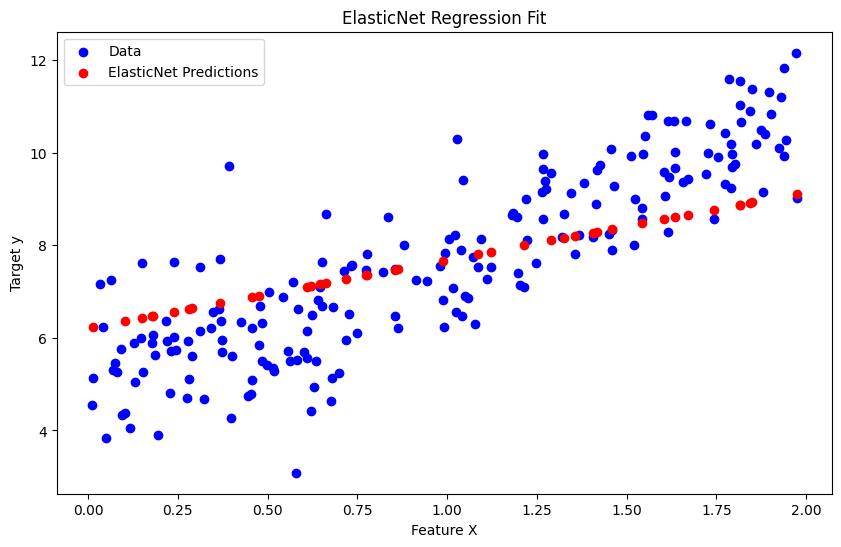

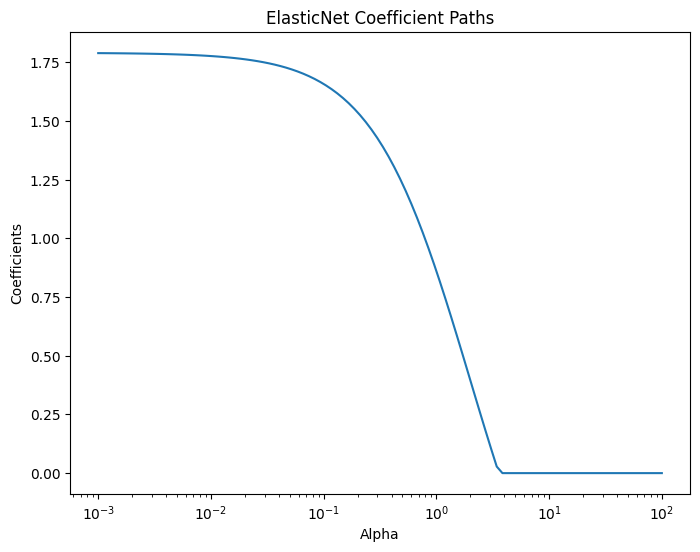

In [11]:
# -----------------------------
# 8. VISUALIZATION
# -----------------------------
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Data")
plt.scatter(X_test, y_pred, color="red", label="ElasticNet Predictions")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.title("ElasticNet Regression Fit")
plt.legend()
plt.show()


# Plot coefficient paths (for interpretability)
alphas = np.logspace(-3, 2, 100)
coefs = []


for a in alphas:
 model = ElasticNet(alpha=a, l1_ratio=0.5, fit_intercept=True, max_iter=10000)
 model.fit(X_train_scaled, y_train)
 coefs.append(model.coef_)


plt.figure(figsize=(8, 6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('ElasticNet Coefficient Paths')
plt.show()